# Ashmeet Kaur
# Task 6: - Create the Decision Tree classifier and visualize it graphically. 
# @The Sparks Foundation

# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load dataset

In [2]:
data=pd.read_csv("E:/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data=data.drop("Id",axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df=data.copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

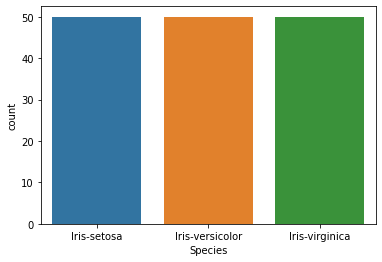

In [11]:
sns.countplot(x='Species',data=data)
plt.show()

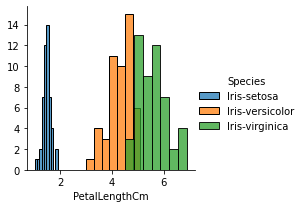

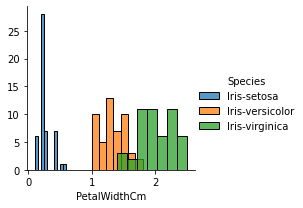

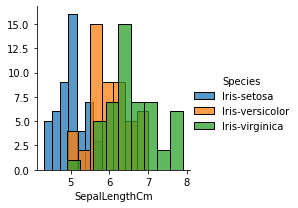

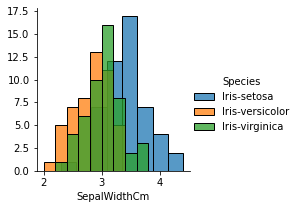

In [12]:
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"PetalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"SepalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",height=3).map(sns.histplot,"SepalWidthCm").add_legend()
plt.show()

In [13]:
from sklearn import preprocessing
labels=preprocessing.LabelEncoder()
data['species']=labels.fit_transform(data['Species'])

In [14]:
data['species'].unique()

array([0, 1, 2])

In [15]:
data=data.drop('Species',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
train=data.iloc[:,0:4]
train.shape

(150, 4)

In [17]:
test=data.iloc[:,4]
test.shape

(150,)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [19]:
print(x_train.shape);print(x_test.shape)

(120, 4)
(30, 4)


In [20]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions=model.predict(x_test)

In [22]:
result=pd.DataFrame({"Actual":y_test,"Predicted":predictions})
result

,Actual,Predicted
123,2,2
26,0,0
87,1,1
2,0,0
38,0,0
61,1,1
18,0,0
122,2,2
108,2,2
137,2,2


<AxesSubplot:>

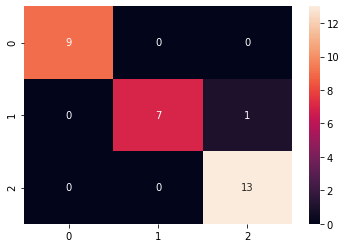

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test, predictions)
#print(cm)
sns.heatmap(cm, annot=True)

In [24]:
print("Accuracy of the model is:",accuracy_score(y_test,predictions)*100)

Accuracy of the model is: 96.66666666666667


In [25]:
print(classification_report(y_test, predictions,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     0.875     0.933         8
           2      0.929     1.000     0.963        13

    accuracy                          0.967        30
   macro avg      0.976     0.958     0.965        30
weighted avg      0.969     0.967     0.966        30



# Display Decision tree

In [26]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



[Text(558.0, 996.6, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 42, 37]\nclass = Iris-versicolor'),
 Text(418.5, 815.4000000000001, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Iris-setosa'),
 Text(697.5, 815.4000000000001, 'PetalWidthCm <= 1.65\ngini = 0.498\nsamples = 79\nvalue = [0, 42, 37]\nclass = Iris-versicolor'),
 Text(279.0, 634.2, 'PetalLengthCm <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]\nclass = Iris-versicolor'),
 Text(139.5, 453.0, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = Iris-versicolor'),
 Text(418.5, 453.0, 'PetalWidthCm <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(558.0, 271.79999999999995, 'SepalLengthCm <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(418.5, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = I

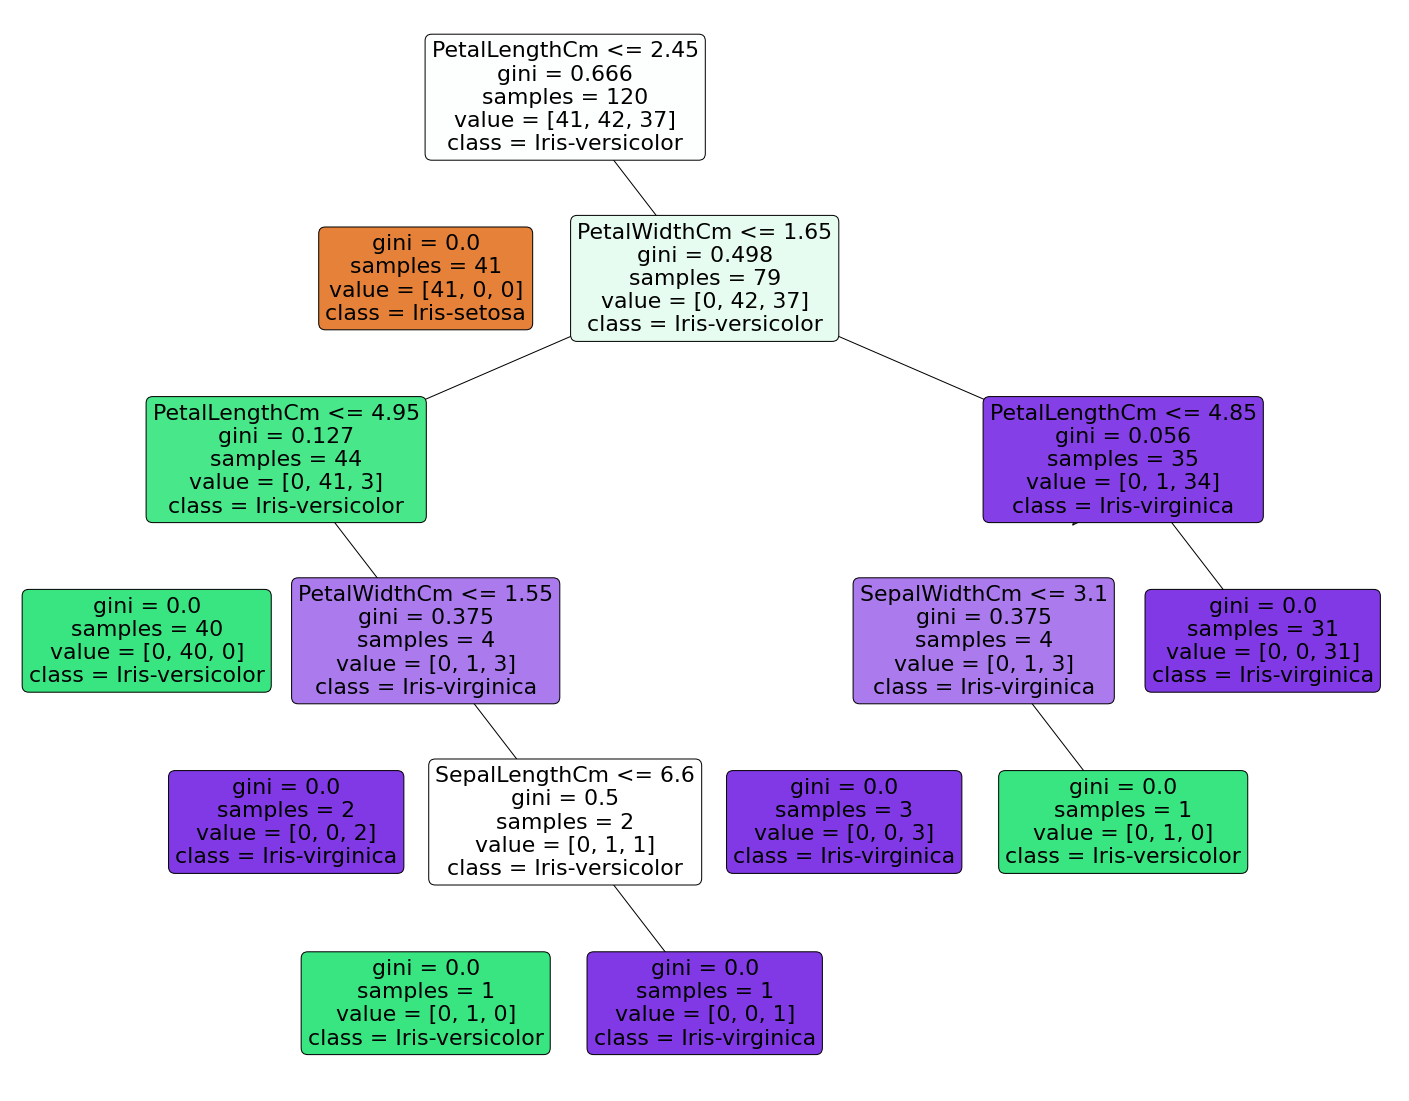

In [29]:
feature_names=df.columns[:4]
target_names=df['Species'].unique().tolist()
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=feature_names,class_names=target_names,filled=True,rounded=True)